In [1]:
# 데이터 조작 라이브러리
import pandas as pd
import numpy as np

In [30]:
import tensorflow as tf

print(tf.__version__)

2.11.0


In [36]:
import keras

print(keras.__version__)

2.11.0


In [37]:
from tensorflow import keras

In [3]:
from tensorflow.keras import layers

In [4]:
featuresData=pd.read_csv("../dataset/feature_regression_example.csv")

In [5]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


### A. 데이터 전처리

#### A-1. 타입통합/ 특성 숫자컬럼 추가

In [6]:
labelMap = {"N": 0, "Y": 1}

In [7]:
featuresData["HOLIDAY_NUM"] = featuresData["HOLIDAY"].map(labelMap)
featuresData["PROMOTION_NUM"] = featuresData["PROMOTION"].map(labelMap)

In [8]:
label=["QTY"]

In [9]:
features = featuresData.select_dtypes(np.number).columns
features = list(set(features) - set(label))

In [10]:
print("label: {}".format(label))
print("features: {}".format(features))

label: ['QTY']
features: ['HOLIDAY_NUM', 'WEEK', 'YEARWEEK', 'PRO_PERCENT', 'YEAR', 'PROMOTION_NUM', 'HCLUS']


In [11]:
stdRatio=0.8

In [12]:
stdIndex=int(featuresData.shape[0]*stdRatio)

In [13]:
stdYearWeek = featuresData.loc[stdIndex].YEARWEEK

In [14]:
trainingDataFeatures=featuresData.loc[featuresData.YEARWEEK <=stdYearWeek, features]
trainingDataLabel=featuresData.loc[featuresData.YEARWEEK <=stdYearWeek, label]
testDataFeatures=featuresData.loc[featuresData.YEARWEEK >stdYearWeek, features]
testDataLabel=featuresData.loc[featuresData.YEARWEEK >stdYearWeek, label]

In [15]:
from sklearn import tree

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
inputShape = trainingDataFeatures.loc[0].shape

In [18]:
model = Sequential()


In [19]:
model.add(Dense(units= 8, activation="relu", input_shape=inputShape))
model.add(Dense(units= 8, activation="relu"))
model.add(Dense(units= 1, activation="relu"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


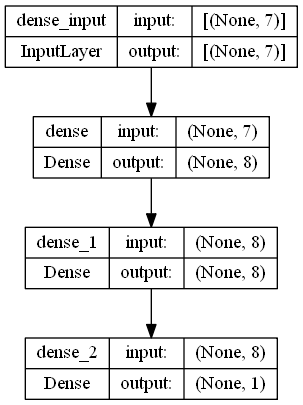

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model_plot.png',
        show_shapes=True,
        show_layer_names=True)

In [28]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, 
                                                    ModelCheckpoint, EarlyStopping
datetime.now().strftime("%Y%m%d_%H%M%S")
logdir = os.path.join("logs",datetime.now().strftime("%Y%m%d_%H%M%S"))

callbacks = [
    TensorBoard(
    log_dir = logdir),
    
    ModelCheckpoint(
        "model_b_out.h5", monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
]
history = model.fit(trainingData_features,
                        trainingData_label,
                        epochs=100,
                        batch_size=32,
                        callbacks=callbacks,
                        validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

plt.plot(history.history['acc'])

plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.grid()
plt.show()

In [54]:
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("keras_diabets.h5")

In [55]:
from tensorflow.keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("keras_diabets.h5")

In [56]:
loaded_model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping_monitor = EarlyStopping(patience=50)
EPOCHS = 100



In [ ]:
history =loaded_model.fit(trainingData_features,
    trainingData_label,
    validation_split=0.2, epochs= EPOCHS,
callbacks=[early_stopping_monitor])

In [57]:
patient_1 = pd.DataFrame([[0,137,90,35,168,43.1,2.288,33]])

In [ ]:
prediction = model.predict(patient_1)
prediction